# Import Libraries

In [18]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Generate and Visualize data

In [19]:
data = np.sin(0.1*np.arange(200))

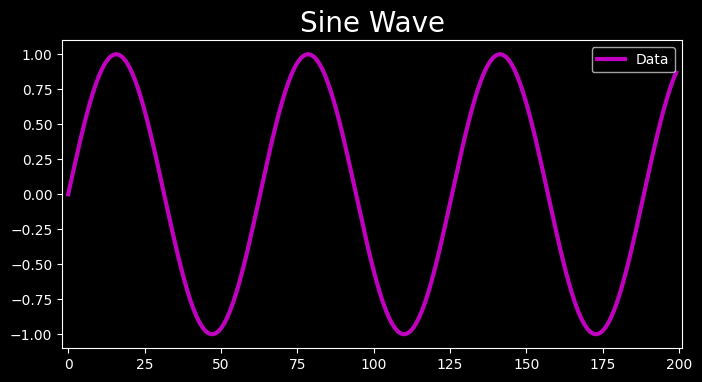

In [20]:
plt.figure(figsize=(8,4))
plt.xlim(-2,201)
plt.plot(data, 'm', lw =3, label = 'Data')
plt.title('Sine Wave', fontsize = 20)
plt.legend()
plt.show()

In [21]:
data.shape

(200,)

# Set the data for LSTM Using Window size or Seqlen = 10

In [22]:
T = 10
X = []
Y = []
for t in range(len(data) - T):
  x = data[t:t+T]
  X.append(x)
  y = data[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Reshape to N x T x D
y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "y.shape", y.shape)

X.shape (190, 10, 1) y.shape (190,)


# Split the half of the data to train and half to test

In [ ]:
X_train = X[:-N//2]
y_train = y[:-N//2]
X_test  = X[-N//2:]
y_test  = y[-N//2:]

# Create LSTM Model

In [23]:
H = 5 # Hidden size
i = Input(shape=(T, 1))  # Input is T x D
print(i.shape)
X = LSTM(H)(i)
X = Dense(1)(X)
model = Model(i, X)


(None, 10, 1)


# Compile the Model

In [24]:
model.compile( loss='mse', optimizer=Adam(learning_rate = 0.1) )

# Train the Model

In [25]:
hist = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))

Epoch 1/80
3/3 [==============================] - 3s 294ms/step - loss: 0.2157 - val_loss: 0.2495
Epoch 2/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0937 - val_loss: 0.0547
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0527 - val_loss: 0.0540
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0264 - val_loss: 0.0230
Epoch 5/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0155 - val_loss: 0.0261
Epoch 6/80
3/3 [==============================] - 0s 32ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 7/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0072 - val_loss: 0.0116
Epoch 8/80
3/3 [==============================] - 0s 39ms/step - loss: 0.0060 - val_loss: 0.0020
Epoch 9/80
3/3 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 10/80
3/3 [==============================] - 0s 43ms/step - loss: 0.0032 - val_loss: 9.8774e-04
Epoch 11/80
3/3 [=======

# Visualize Training and Test Loss

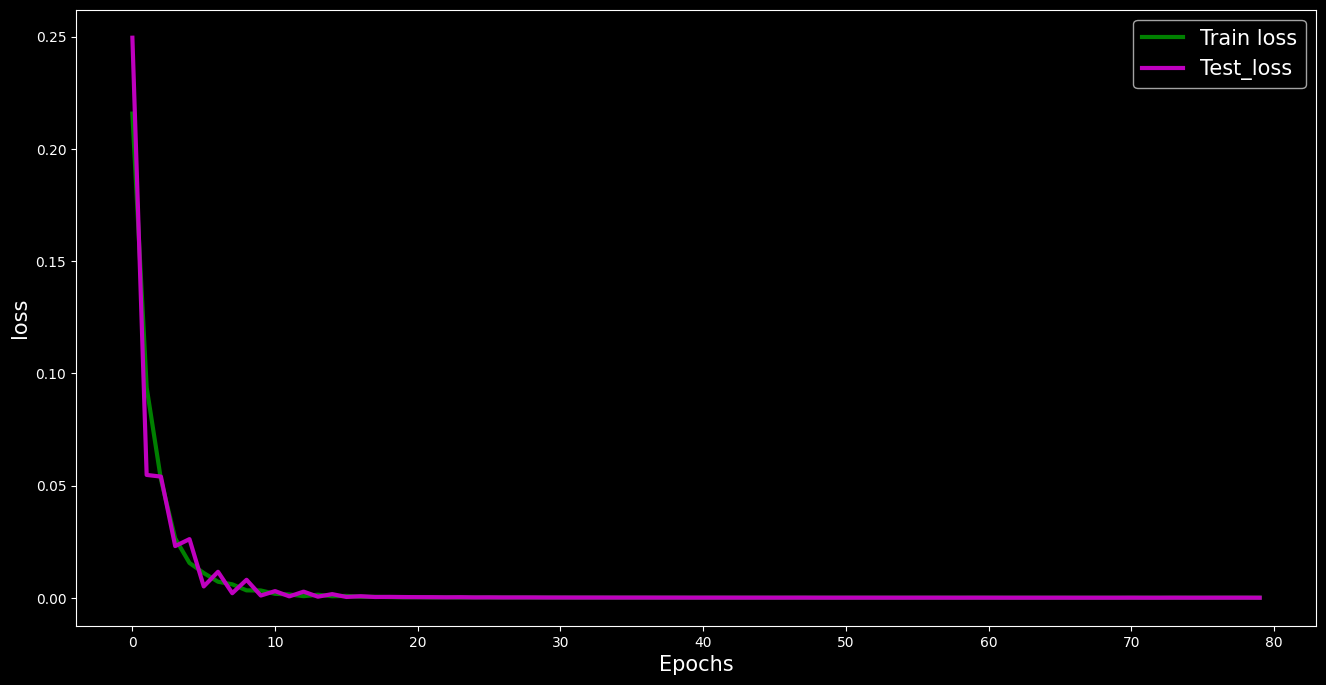

In [26]:
plt.figure(figsize = (16, 8))
plt.plot(hist.history['loss'],'g', lw = 3,  label='Train loss')
plt.plot(hist.history['val_loss'],'m', lw = 3, label='Test_loss')
plt.legend(fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

# Test the Model by getting predictions about the future values

In [30]:
ypred = []

# first input for test

input_x = X_test[0]

while len(ypred) < len(X_test):
  predicted = model.predict(input_x.reshape(1, -1), verbose = 0)[0,0]

  # update the predictions list
  ypred.append(predicted)

  # Get the next testing input
  input_x = np.roll(input_x, -1)
  input_x[-1] = predicted

In [27]:
X_test[0]

array([[-0.07515112],
       [-0.17432678],
       [-0.27176063],
       [-0.36647913],
       [-0.45753589],
       [-0.54402111],
       [-0.62507065],
       [-0.69987469],
       [-0.76768581],
       [-0.82782647]])

In [28]:
X_test[0].reshape(1, -1)

array([[-0.07515112, -0.17432678, -0.27176063, -0.36647913, -0.45753589,
        -0.54402111, -0.62507065, -0.69987469, -0.76768581, -0.82782647]])

In [29]:
X_test[0].reshape(1, -1)[0, 0]

-0.0751511204618093

In [31]:
predicted

0.699901

# Visualize Performance of the Model

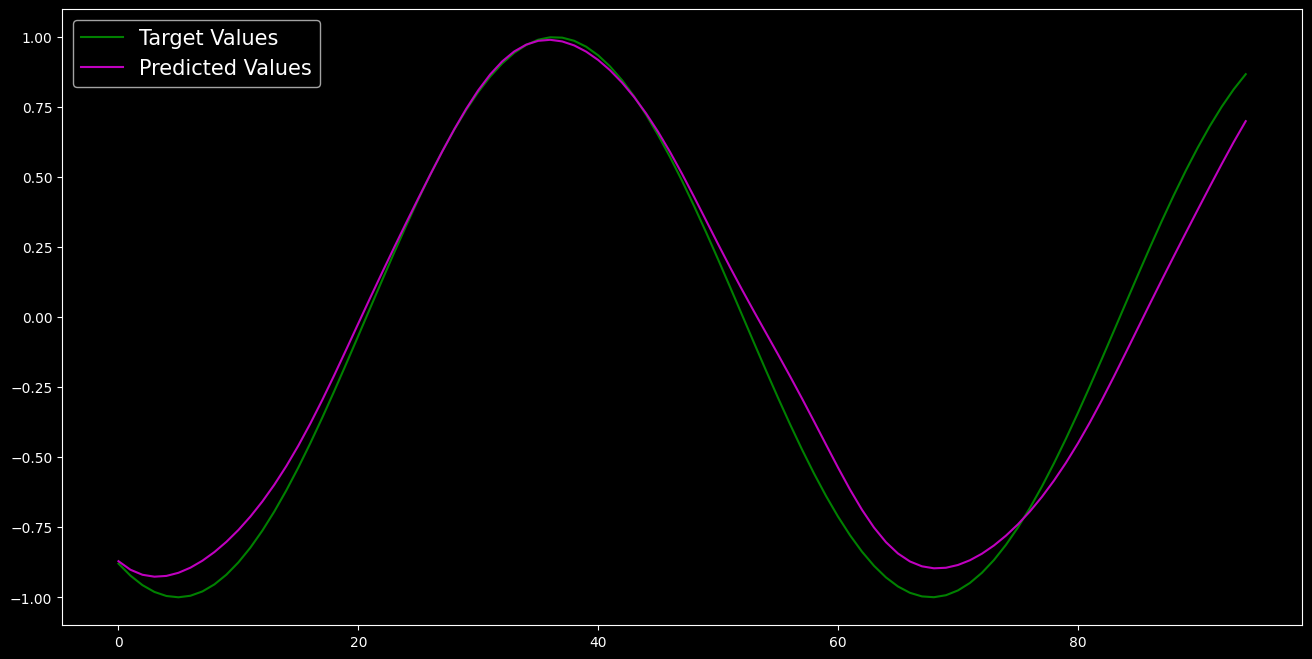

In [32]:
plt.figure(figsize = (16, 8))
plt.plot(y_test, 'g', label='Target Values')
plt.plot(ypred,'m', label='Predicted Values')
plt.legend(fontsize = 15)
plt.show()